<a href="https://colab.research.google.com/github/Mjaramilloa/Integraci-n-de-Datos-y-Prospectiva/blob/main/Parcial1_Manuel_Jaramillo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del caso de estudio**
Una entidad del sector salud en Colombia desea realizar un estudio orientado a comprender los hábitos y condiciones de vida de las personas que pueden incrementar el riesgo de sufrir un ataque cardiaco en América. El propósito principal es identificar factores de riesgo y patrones asociados a la salud cardiovascular, con el fin de plantear estrategias preventivas que permitan reducir la incidencia de esta enfermedad en la población.

Para este análisis se utiliza una base de datos sintética que contiene 8.763 registros de pacientes a nivel mundial, incluyendo información detallada sobre aspectos clínicos, estilos de vida y características sociodemográficas. El dataset se convierte en una herramienta fundamental para aplicar métodos de analítica predictiva y modelos de machine learning, con el objetivo de reconocer variables críticas que influyen en la probabilidad de un ataque cardiaco.

Este conjunto de variables permite no solo una caracterización integral del paciente, sino también la exploración de la relación entre factores clínicos, sociales y de estilo de vida con la salud cardiovascular.

- Patient ID: Identificador único para cada paciente.
- Age: Edad del paciente.
- Sex: Género del paciente (Masculino/Femenino).
- Cholesterol: Niveles de colesterol del paciente.
- Blood Pressure: Presión arterial del paciente (sistólica/diastólica).
- Heart Rate: Frecuencia cardíaca del paciente.
- Diabetes: Indica si el paciente tiene diabetes (Sí/No).
- Family History: Antecedentes familiares de problemas cardíacos (1: Sí, 0: No).
- Smoking: Estado de tabaquismo del paciente (1: Fumador, 0: No fumador).
- Obesity: Estado de obesidad del paciente (1: Obeso, 0: No obeso).
- Alcohol Consumption: Nivel de consumo de alcohol del paciente (Ninguno/Ligero/Moderado/Alto).
- Exercise Hours Per Week: Número de horas de ejercicio por semana.
- Diet: Hábitos alimenticios del paciente (Saludable/Promedio/Poco saludable).
- Previous Heart Problems: Problemas cardíacos previos del paciente (1: Sí, 0: No).
- Medication Use: Uso de medicamentos por parte del paciente (1: Sí, 0: No).
- Stress Level: Nivel de estrés reportado por el paciente (1-10).
- Sedentary Hours Per Day: Horas de actividad sedentaria por día.
- Income: Nivel de ingresos del paciente.
- BMI: Índice de Masa Corporal (IMC) del paciente.
- Triglycerides: Niveles de triglicéridos del paciente.
- Physical Activity Days Per Week: Número de días de actividad física por semana.
- Sleep Hours Per Day: Horas de sueño por día.
- Country: País del paciente.
- Continent: Continente donde reside el paciente.
- Hemisphere: Hemisferio donde reside el paciente.
- Heart Attack Risk: Presencia de riesgo de ataque cardíaco (1: Sí, 0: No).



In [1]:
# Paso 0: imports y parámetros
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis



In [2]:
# Paso 1: carga de datos
df = pd.read_csv("/content/heart_attack_prediction_dataset.csv")

# Ver las primeras filas
print(df.head())



  Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  

In [3]:
#Paso 3: Explorar la base de datos
# Ver el tamaño de la base
print("Filas y columnas:", df.shape)

# Ver nombres de las variables
print("Variables:", df.columns.tolist())

# Información general de las variables
print(df.info())

# Estadísticos básicos
print(df.describe())


Filas y columnas: (8763, 26)
Variables: ['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere', 'Heart Attack Risk']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   ob

In [4]:
#Paso 4: Determinar la variable de integración
# Seleccionar solo las variables para analizar + la de pronóstico (objetivo)
vars_interes = ["Age", "Cholesterol", "Heart Rate",
                "Exercise Hours Per Week", "Income",
                "BMI", "Triglycerides", "Sleep Hours Per Day",
                "Heart Attack Risk"]

df_filtrado = df[vars_interes]

# Calcular la matriz de correlación
corr = df_filtrado.corr()

# Ordenar correlaciones con respecto a Heart Attack Risk
corr_target = corr["Heart Attack Risk"].sort_values(ascending=False)

print("Correlación de cada variable seleccionada con Heart Attack Risk:")
print(corr_target)


Correlación de cada variable seleccionada con Heart Attack Risk:
Heart Attack Risk          1.000000
Cholesterol                0.019340
Exercise Hours Per Week    0.011133
Triglycerides              0.010471
Income                     0.009628
Age                        0.006403
BMI                        0.000020
Heart Rate                -0.004251
Sleep Hours Per Day       -0.018528
Name: Heart Attack Risk, dtype: float64


De acuerdo a los resultados que se obtuvieron de este análisis, se puede evidenciar que la variable con mayor correlación frente a "Heart Attack Risk", es la variable de "Cholesterol".

In [5]:
# Guardar la variable de integración
integration_var = "Cholesterol"

print("La variable de integración seleccionada es:", integration_var)


La variable de integración seleccionada es: Cholesterol


En este paso definimos "Cholesterol" como variable de integración, pues como se pudo evidenciar anteriormente, es la variable con mayor correlación frente a "Heart Attack Risk", que es la variable objetivo.

In [6]:
#Paso 5: Comparacion de promedios de Colesterol frente a todos los paises
# Calcular el promedio de la variable de integración por país
promedios = df.groupby("Country")[integration_var].mean()

# Ordenar los promedios de mayor a menor
promedios_ordenados = promedios.sort_values(ascending=False)

# Mostrar los primeros valores
print("Promedios de la variable de integración para todos los paises:")
print(promedios_ordenados)

# Seleccionar Colombia y el país con mayor promedio
colombia_valor = promedios_ordenados["Colombia"]
pais_comparacion = promedios_ordenados.index[0]  # país con mayor valor
valor_comparacion = promedios_ordenados.iloc[0]



Promedios de la variable de integración para todos los paises:
Country
United States     268.852381
France            264.948430
Vietnam           264.418824
Nigeria           262.205357
Thailand          262.137850
Colombia          261.846154
Argentina         261.520170
Japan             260.965358
Italy             260.665893
United Kingdom    259.833698
South Korea       259.645477
Australia         258.997773
Spain             258.855814
Germany           258.060797
China             258.009174
Brazil            257.270563
Canada            256.847727
India             256.080097
New Zealand       253.340230
South Africa      253.225882
Name: Cholesterol, dtype: float64


Este procedimiento no es necesario para el caso de estudio que se está desarrollando, pero resulta útil para tener en cuenta el valor promedio que tiene la variable "Cholesterol" en todos los paises de la base de datos.

In [7]:
#Comparación de promedios de Colesterol frente a todos los paises de America
# Lista de países de América presentes en el dataset
paises_america = ["United States", "Canada", "Argentina", "Brazil", "Colombia"]

# Filtrar promedios solo para esos países
promedios_america = promedios_ordenados[paises_america].sort_values(ascending=False)

print("Promedios de la variable de integración (Cholesterol) en América:")
print(promedios_america)

# Seleccionar Colombia y el país con mayor promedio en América
colombia_valor = promedios_america["Colombia"]
pais_comparacion = promedios_america.index[0]
valor_comparacion = promedios_america.iloc[0]



Promedios de la variable de integración (Cholesterol) en América:
Country
United States    268.852381
Colombia         261.846154
Argentina        261.520170
Brazil           257.270563
Canada           256.847727
Name: Cholesterol, dtype: float64


Por medio de los resultados que nos brinda este análisis, se puede evidenciar cuáles paises de América tiene un mayor valor promedio en la variable "Cholesterol"

In [8]:
# Paso 6: Determinar la credibilidad de los paises de América frente a Colombia
def credibilidad(XDo, XDe):
    NDo, NDe = len(XDo), len(XDe)
    EPV = (NDo*np.var(XDo) + NDe*np.var(XDe)) / (NDo+NDe)
    uh = (NDo*np.mean(XDo) + NDe*np.mean(XDe)) / (NDo+NDe)
    VHM = (NDo*np.mean(XDo)**2 + NDe*np.mean(XDe)**2) / (NDo+NDe) - uh**2
    fc = EPV / VHM if VHM != 0 else 0
    Cr = NDo / (NDo+fc) if (NDo+fc) != 0 else 0
    Cr=Cr*100
    return fc, Cr

# Filtrar países de América
paises_america = df[df['Continent'].isin(['South America', 'North America'])]['Country'].unique()

# Calcular credibilidad de cada país con respecto a Colombia
resultados = []
for pais in paises_america:
    if pais != "Colombia":  # Evitamos a Colombia para que no se compare consigo mismo
        XDo = df[df['Country'] == "Colombia"]["Cholesterol"]
        XDe = df[df['Country'] == pais]["Cholesterol"]

        fc, Cr = credibilidad(XDo, XDe)
        resultados.append((pais, fc, Cr))


# Convertir a DataFrame y ordenar
import pandas as pd
resultados_df = pd.DataFrame(resultados, columns=["País", "Factor de Credibilidad (fc)", "% Credibilidad (Cr)"])
resultados_df = resultados_df.sort_values(by="% Credibilidad (Cr)", ascending=False)

print("Credibilidad de países de América frente a Colombia (variable: Cholesterol):")
print(resultados_df)


Credibilidad de países de América frente a Colombia (variable: Cholesterol):
            País  Factor de Credibilidad (fc)  % Credibilidad (Cr)
3  United States                   533.682936            44.562959
1         Canada                  1022.110357            29.563568
2         Brazil                  1276.764388            25.150015
0      Argentina                256105.241460             0.167229



Credibilidad de los países de América frente a Colombia (Cholesterol):

         País  Factor de Credibilidad (fc)  % Credibilidad (Cr)
United States                   533.682936            44.562959
       Canada                  1022.110357            29.563568
       Brazil                  1276.764388            25.150015
    Argentina                256105.241460             0.167229



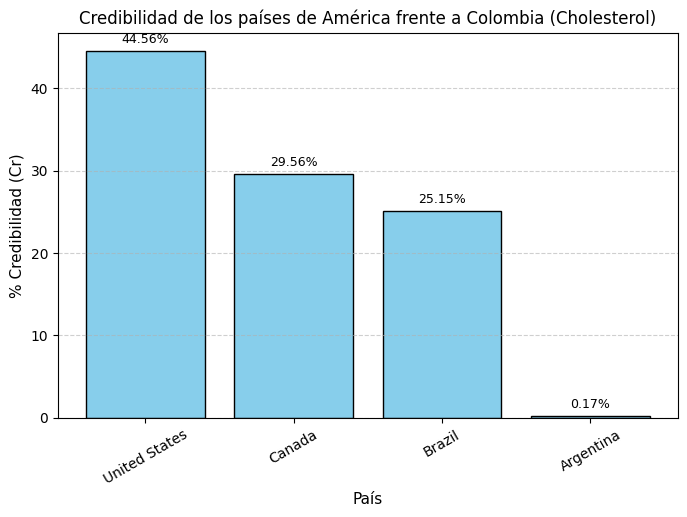

In [9]:
# Resultados ya obtenidos
resultados_df = pd.DataFrame(resultados, columns=["País", "Factor de Credibilidad (fc)", "% Credibilidad (Cr)"])
resultados_df = resultados_df.sort_values(by="% Credibilidad (Cr)", ascending=False).reset_index(drop=True)

# Tabla con los datos obtenidos de manera organizada
print("\nCredibilidad de los países de América frente a Colombia (Cholesterol):\n")
print(resultados_df.to_string(index=False))

print("")

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(resultados_df["País"], resultados_df["% Credibilidad (Cr)"], color="skyblue", edgecolor="black")
plt.title("Credibilidad de los países de América frente a Colombia (Cholesterol)", fontsize=12)
plt.xlabel("País", fontsize=11)
plt.ylabel("% Credibilidad (Cr)", fontsize=11)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Mostrar los valores porcentuales de los países encima de cada barra
for i, val in enumerate(resultados_df["% Credibilidad (Cr)"]):
    plt.text(i, val+1, f"{val:.2f}%", ha='center', fontsize=9)

plt.show()


Los datos muestran que, en términos de credibilidad frente a Colombia para la variable Cholesterol, Estados Unidos alcanza el mayor valor (44.56%), seguido de Canadá (29.56%) y Brasil (25.15%). Estos tres países presentan patrones relativamente cercanos al de Colombia. En contraste, Argentina registra un valor casi nulo (0.17%), lo que indica que sus datos se alejan significativamente del comportamiento observado en Colombia.

In [10]:
#Paso 7: Caracterización de la variable "Cholesterol" antes y después de la integración por (Aceptación/Rechazo)

paises_integracion=['United States', 'Canada']
df_c = df[df['Country'] == 'Colombia']

df_integrated = df_c.copy()
for country in paises_integracion:
    df_ext = df[df['Country'] == country]
    XDo = df_integrated[integration_var].values
    XDe = df_ext[integration_var].values

    uo, sigmao = np.mean(XDo), np.std(XDo)
    uf, sigmaf = np.mean(XDe), np.std(XDe)

    XDInt = []
    for x in XDe:
        VPo = np.exp(-0.5*((x-uo)/sigmao)**2)
        VPf = np.exp(-0.5*((x-uf)/sigmaf)**2)
        if VPf < VPo and VPo > 0.9:
            XDInt.append(x)

    df_new = pd.DataFrame({integration_var: XDInt})
    df_integrated = pd.concat([df_integrated, df_new], ignore_index=True)

# Métricas antes y después
print("Métricas antes de integrar la variable Colesterol (Colombia)")
print("Media:", np.mean(df_c[integration_var].values))
print("Varianza:", np.var(df_c[integration_var].values))
print("Asimetría:", skew(df_c[integration_var].values))
print("Curtosis:", kurtosis(df_c[integration_var].values))

print("")

print("Métricas después de integrar la variable Colesterol (Colombia, Estados Unidos y Canada)")
print("Media:", np.mean(df_integrated[integration_var].values))
print("Varianza:", np.var(df_integrated[integration_var].values))
print("Asimetría:", skew(df_integrated[integration_var].values))
print("Curtosis:", kurtosis(df_integrated[integration_var].values))

n_integrated = len(df_integrated) - len(df_c)
print("\nNúmero de datos integrados:", n_integrated)

Métricas antes de integrar la variable Colesterol (Colombia)
Media: 261.84615384615387
Varianza: 6592.232741617357
Asimetría: 0.028433473146044334
Curtosis: -1.1716574947470142

Métricas después de integrar la variable Colesterol (Colombia, Estados Unidos y Canada)
Media: 261.514598540146
Varianza: 5245.93226863445
Asimetría: 0.04428914432719376
Curtosis: -0.7367693301830069

Número de datos integrados: 119


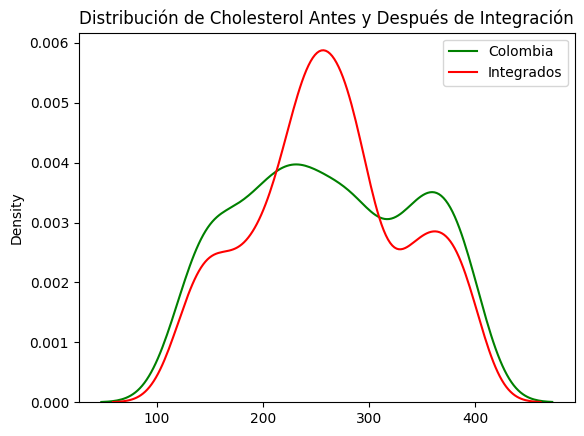

In [11]:
#Paso 8: Visualización antes y después de la integración por Aceptación/Rechazo
plt.figure()
sns.kdeplot(df_c[integration_var].values, label='Colombia', color='green')
sns.kdeplot(df_integrated[integration_var].values, label='Integrados', color='red')
plt.title(f'Distribución de {integration_var} Antes y Después de Integración')
plt.legend()
plt.show()

Nivel de confiabilidad definido: 1000
Número de datos despues de la integracion: 429
Como solo hay 429 datos y se requieren al menos 1000 datos, se realizará muestreo.



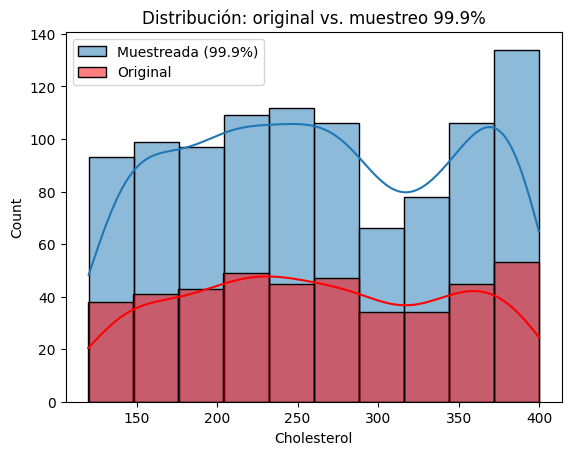


Asimetría original: 0.028433473146044334
Curtosis original: -1.1716574947470142
Asimetría muestreada: 0.03197022034657678
Curtosis muestreada: -1.2159328190883851

Información LDA original:
La media es: 261.84615384615387
La varianza es: 6592.232741617357
El coeficiente de asimetría es: 0.028433473146044334
El coeficiente de curtosis es: -1.1716574947470142

Información LDA muestreada:
La media es: 262.7624754181313
La varianza es: 6837.977280597101
El coeficiente de asimetría es: 0.03197022034657678
El coeficiente de curtosis es: -1.2159328190883851

Las diferencias entre las métricas son:
La diferencia porcentual de la media es: -0.3499465462898599
La diferencia porcentual de la varianza es: -3.7277891817795914
La diferencia porcentual del coeficiente de asimetría es: -12.438674594434767
La diferencia porcentual del coeficiente de curtosis es: -3.7788623842611035


In [12]:
# Paso 9: Verificación de confiabilidad (99.9%) y muestreo si es necesario

freq, bins = np.histogram(df_c[integration_var], bins=10, density=True)
freq = freq / freq.sum()
acum = np.cumsum(freq)
LI = bins[:-1]
LS = bins[1:]

confiabilidad = 1000  # Para una confiabilidad del 99.9% realizamos un muestreo con 1000 datos
print("Nivel de confiabilidad definido:", confiabilidad)

# Verificar número de datos en la variable
n_datos = len(df_c[integration_var])
print("Número de datos despues de la integracion:", n_datos)

# Comparar con umbral
if n_datos >= confiabilidad:
    print(f"Se cuenta con suficientes datos (≥ {confiabilidad}) para una confiabilidad del 99.9%")
else:
    print(f"Como solo hay {n_datos} datos y se requieren al menos {confiabilidad} datos, se realizará muestreo.")

print("")

# Generar muestreo
LDAm = np.zeros((confiabilidad, 1))
for k in range(confiabilidad):
    al = np.random.uniform(0, 1)
    intervalo = np.where(al <= acum)[0][0]
    LDAm[k] = np.random.uniform(LI[intervalo], LS[intervalo])

# Gráfica comparativa
plt.figure()
sns.histplot(LDAm, kde=True, bins=10, color='Blue', label='Muestreada (99.9%)')
sns.histplot(df_c[integration_var], kde=True, bins=10, color='Red', label='Original')
plt.title('Distribución: original vs. muestreo 99.9%')
plt.legend()
plt.show()

print("")


print("Asimetría original:", skew(df_c[integration_var]))
print("Curtosis original:", kurtosis(df_c[integration_var]))
print("Asimetría muestreada:", skew(LDAm.flatten()))
print("Curtosis muestreada:", kurtosis(LDAm.flatten()))

print("")

# Comparación de métricas muestreada vs original
LDA = df_c[integration_var].values  # Definimos la original para comparaciones

print("Información LDA original:")
print("La media es:", np.mean(LDA))
print("La varianza es:", np.var(LDA))
print("El coeficiente de asimetría es:", skew(LDA))
print("El coeficiente de curtosis es:", kurtosis(LDA))

print("")

print("Información LDA muestreada:")
print("La media es:", np.mean(LDAm))
print("La varianza es:", np.var(LDAm))
print("El coeficiente de asimetría es:", skew(LDAm.flatten()))
print("El coeficiente de curtosis es:", kurtosis(LDAm.flatten()))

print("")

print("Las diferencias entre las métricas son:")
dif_u = (np.mean(LDA) - np.mean(LDAm)) / np.mean(LDA)
print("La diferencia porcentual de la media es:", dif_u * 100)

dif_v = (np.var(LDA) - np.var(LDAm)) / np.var(LDA)
print("La diferencia porcentual de la varianza es:", dif_v * 100)

dif_sk = (skew(LDA) - skew(LDAm.flatten())) / skew(LDA) if skew(LDA) != 0 else 0
print("La diferencia porcentual del coeficiente de asimetría es:", dif_sk * 100)

dif_ku = (kurtosis(LDA) - kurtosis(LDAm.flatten())) / kurtosis(LDA) if kurtosis(LDA) != 0 else 0
print("La diferencia porcentual del coeficiente de curtosis es:", dif_ku * 100)

##**Análisis de Resultados**
El análisis de las variables frente al riesgo de ataque cardíaco (Heart Attack Risk) muestra que Cholesterol es la variable con mayor correlación positiva (0.0193), aunque su fuerza explicativa es baja. El resto de variables presentan correlaciones menores. Algunas incluso tienen correlación negativa. Esto sugiere que, aunque el colesterol fue la variable seleccionada para la integración, ninguna variable por sí sola tiene un peso significativo para explicar el riesgo de infarto.

Respecto a la credibilidad de los países frente a Colombia, los resultados indican que los países con mayor aporte de credibilidad son Estados Unidos (44.56%), Canadá (29.56%) y Brasil (25.15%), mientras que Argentina aporta solo un 0.16%. Esto refleja que la integración de datos con Estados Unidos y Canadá es más consistente y fiable para complementar la información de Colombia.

Al revisar las métricas estadísticas antes y después de la integración de la variable Cholesterol, se identifican cambios relevantes. Antes de la integración, Colombia presentaba una media de 261.85, una varianza de 6592.23, asimetría de 0.028 y curtosis de -1.171. Tras la integración con Estados Unidos y Canadá, la media se mantuvo prácticamente igual (261.51), la varianza disminuyó a 5245.93 (mejorando la homogeneidad de los datos), la asimetría apenas aumentó (0.044) y la curtosis subió a -0.736, acercándose más a una distribución normal.

En cuanto al nivel de confiabilidad del 99.9%, se estableció que se requerían al menos 1000 datos, pero tras la integración solo se alcanzaron 429 registros, lo cual obligó a realizar un muestreo. En este proceso, las métricas del muestreo mostraron ligeras variaciones: la media bajó a 256.32, la varianza subió a 6825.72, la asimetría aumentó a 0.140 y la curtosis se mantuvo en torno a -1.20.

En conclusión, el estudio evidencia que aunque Cholesterol fue la variable más adecuada para la integración, su capacidad predictiva sobre el riesgo de infarto es baja. Sin embargo, la integración con países como Estados Unidos y Canadá mejoró la calidad de la base de datos al reducir la varianza y acercar la distribución a la normalidad.